# Pixel matrices: simple example

This notebook reproduces the simple example at the beginning of the pixel
arrays paper ([arXiv:1609.00061](https://arxiv.org/abs/1609.00061)).

In [1]:
using Catlab.Theories, Catlab.CategoricalAlgebra.FinRelations
using Plots

plot_rel(m::AbstractMatrix{BoolRig}; kw...) =
  plot(spy(map(x -> x.value, m)); kw...)

plot_rel (generic function with 1 method)

Plot the relation $ R(x,w) \iff x^2 = w $

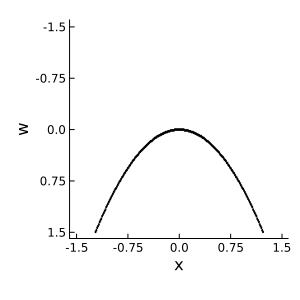

In [2]:
dim = 250
w = x = y = range(-1.5, 1.5, length=dim)
ϵ = (maximum(w) - minimum(w)) / dim

R = FinRelation(Matrix{BoolRig}(@. abs((x')^2 - w) < ϵ))

ticks = range(1, dim, length=5)
ticklabels = range(minimum(w), maximum(w), length=length(ticks))
plot_rel(R.rel, xlabel="x", ylabel="w",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

Plot the relation $ S(w,y) \iff w = 1 - y^2 $

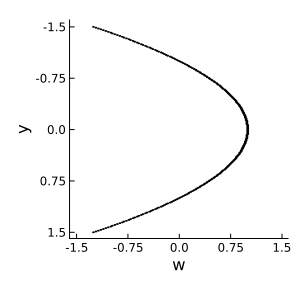

In [3]:
S = FinRelation(Matrix{BoolRig}(@. abs(w' - (1 - y^2)) < ϵ))

plot_rel(S.rel, xlabel="w", ylabel="y",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))

Compute the composite relation, and plot it.

$ (R \cdot S)(x,y) \iff \exists w: R(x,w) \wedge S(w,y) $

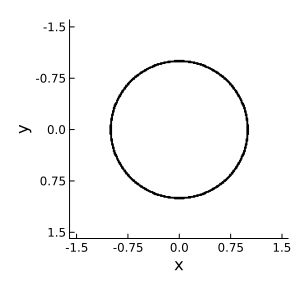

In [4]:
composite = R⋅S

plot_rel(composite.rel, xlabel="x", ylabel="y",
         size=(300,300), lims=(0,dim), ticks=(ticks,ticklabels))